# Name-Sakshi Jaiswal

# TASK 3

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ 

**IMPORTS**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**LOAD THE DATASET**

In [2]:
sample=pd.read_csv("SampleSuperstore.csv")
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Exploratory Data Anaysis

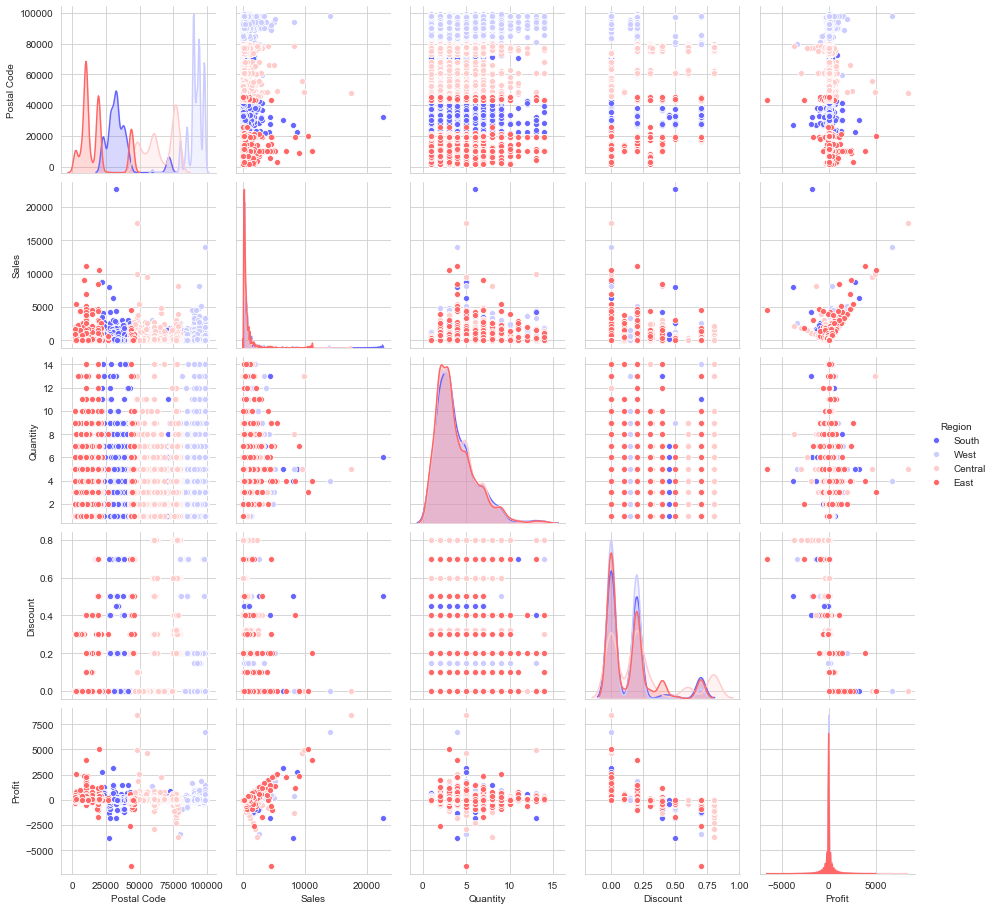

In [5]:
sns.set_style("whitegrid")
sns.pairplot(sample,hue="Region",palette='bwr')

In [6]:
sample['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [7]:
segment=sample.Segment.value_counts().reset_index()
segment.columns=("Segment","Count")
segment

,Segment,Count
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


**Pie chart based on segments**

([<matplotlib.patches.Wedge at 0x1c257a5d7f0>,
 [Text(-0.13408036713364035, 2.1959103932422446, 'Consumer'),
  Text(-1.0537686579632295, -1.9312098838537397, 'Corporate'),
  Text(1.8633972391176687, -1.1695087555245793, 'Home Office')],
 [Text(-0.048756497139505584, 0.798512870269907, '51.94'),
  Text(-0.3831886028957198, -0.7022581395831781, '30.22'),
  Text(0.6775989960427886, -0.425275911099847, '17.84')])

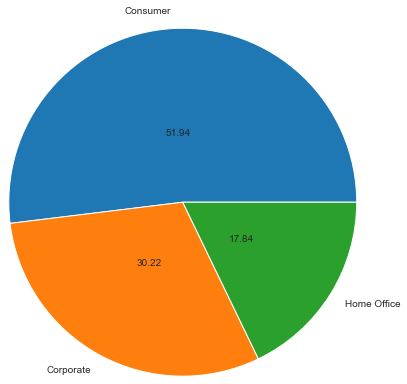

In [8]:
plt.pie(x="Count",labels="Segment",data=segment,radius=2,autopct="%.2f",pctdistance=0.4)

**Countplot for categories and comparing it with region**

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

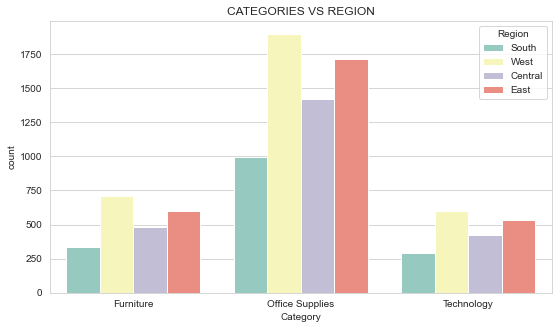

In [9]:
plt.figure(figsize=(9,5))
plt.title('CATEGORIES VS REGION')
sns.countplot(x=sample['Category'],hue=sample['Region'],palette='Set3')
plt.xticks()

**Finding out columns with high sales**

In [10]:
high_sale=sample[sample["Sales"]>3000]
high_sale.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.430,7,0.5,-1665.0522
165,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Technology,Machines,8159.952,8,0.4,-1359.9920
251,Standard Class,Consumer,United States,San Diego,California,92037,West,Technology,Accessories,3347.370,13,0.0,636.0003
262,Second Class,Corporate,United States,Houston,Texas,77036,Central,Technology,Machines,3059.982,3,0.4,-509.9970
318,Standard Class,Home Office,United States,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900


**Finding out the state with high sales**

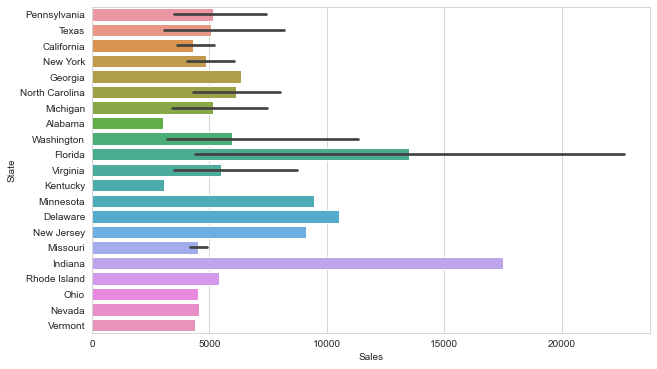

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=high_sale["Sales"],y=high_sale["State"],data=sample)

**We can clearly see sales is highest in two states Indiana and Florida**

**Finding the maximum value of sales**

In [12]:
sample.Sales.max()

22638.48

**Finding the minimum value of sales**

In [13]:
sample.Sales.min()

0.444

**Displaying the states with lowest sales data**

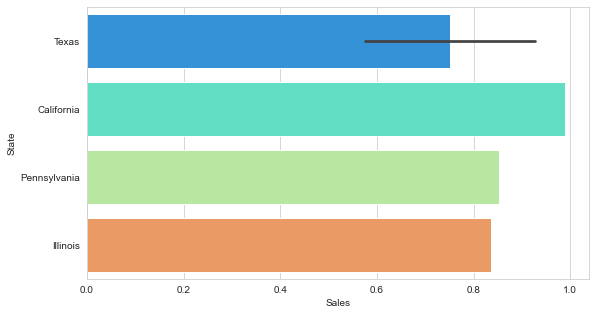

In [14]:
plt.figure(figsize=(9,5))
low_sale=sample[sample["Sales"]<1]
sns.barplot(y=low_sale["State"],x=low_sale["Sales"],data=low_sale,palette='rainbow')

**Displaying data for low profit**

In [15]:
low_profit=sample[sample["Profit"]<1]
low_profit.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522


**Heatmap to visualize which attributes are highly correlated with each other**

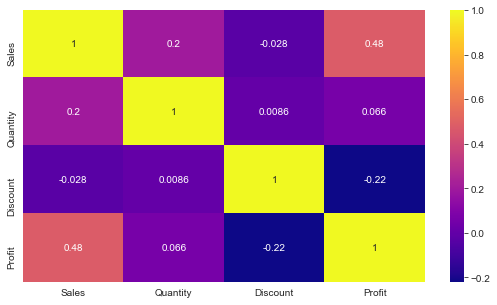

In [16]:
data=['Sales','Quantity','Discount','Profit']
plt.figure(figsize=(9,5))
sns.heatmap(sample[data].corr(),cmap='plasma',annot=True )

**From the above heatmap we can see that Sales and Profit have high positive correlation.Quantity and Discount have almost no correlation ,Profit and Discount are negatively correlated**

**Task Completed!**